In [53]:
import pandas as pd
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots

print("Item Category Info")
item_cat = pd.read_csv("C:/Users/KANGHEA/OneDrive - Hilti/Study/WQD7003/Assignment/GroupAssignment/item_categories.csv")
print(item_cat.info)

print("\nItem Info")
item = pd.read_csv("C:/Users/KANGHEA/OneDrive - Hilti/Study/WQD7003/Assignment/GroupAssignment/items.csv")
print(item.info)

print("\nShops Info")
shops = pd.read_csv("C:/Users/KANGHEA/OneDrive - Hilti/Study/WQD7003/Assignment/GroupAssignment/shops.csv")
print(shops.info)

print("\nTest")
test = pd.read_csv("C:/Users/KANGHEA/OneDrive - Hilti/Study/WQD7003/Assignment/GroupAssignment/test.csv")
print(test.info)

print("\nTrain")
train = pd.read_csv("C:/Users/KANGHEA/OneDrive - Hilti/Study/WQD7003/Assignment/GroupAssignment/sales_train.csv")
print(train.info)

Item Category Info
<bound method DataFrame.info of            item_category_name  item_category_id
0     PC - Гарнитуры/Наушники                 0
1            Аксессуары - PS2                 1
2            Аксессуары - PS3                 2
3            Аксессуары - PS4                 3
4            Аксессуары - PSP                 4
..                        ...               ...
79                  Служебные                79
80         Служебные - Билеты                80
81    Чистые носители (шпиль)                81
82  Чистые носители (штучные)                82
83           Элементы питания                83

[84 rows x 2 columns]>

Item Info
<bound method DataFrame.info of                                                item_name  item_id  \
0              ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1      !ABBYY FineReader 12 Professional Edition Full...        1   
2          ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3        ***ГОЛУБАЯ ВОЛНА  (Un

In [5]:
print('Check whether we have null data')
item_cat.isnull().sum()

Check whether we have null data


item_category_name    0
item_category_id      0
dtype: int64

In [6]:
print('Check whether we have null data for item')
item.isnull().sum() 

Check whether we have null data for item


item_name           0
item_id             0
item_category_id    0
dtype: int64

In [7]:
print('Check whether we have null data for test set')
test.isnull().sum()

Check whether we have null data for test set


ID         0
shop_id    0
item_id    0
dtype: int64

In [8]:
print('Check whether we have null data for training set')
train.isnull().sum()

Check whether we have null data for training set


date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [9]:
print('Compare number of item and number of unique it')
item.count()

Compare number of item and number of unique it


item_name           22170
item_id             22170
item_category_id    22170
dtype: int64

In [10]:
len(pd.unique(item['item_id'])) 

22170

In [11]:
print("Checking how many negative value")
train['item_cnt_day'].loc[lambda x : x>0].count()

Checking how many negative value


2928493

In [12]:
train['item_cnt_day'].loc[lambda x : x<0].count()

7356

In [124]:
# Checking totaly sales per item category
train = pd.read_csv("C:/Users/KANGHEA/OneDrive - Hilti/Study/WQD7003/Assignment/GroupAssignment/sales_train.csv")

#sales_item_cat = train.groupby(['item_id'])['item_price'].count()

#print(sales_item_cat.head(n = 25))
sales_item_cat = pd.merge(train,item,on='item_id')

#For checking specific item category
#sales_item_cat = sales_item_cat[sales_item_cat.item_category_id.isin(["40"])]

sales_item_cat = sales_item_cat[['item_category_id','item_price']]

sales_item_cat = sales_item_cat.groupby(['item_category_id'])[['item_price']].agg('sum').reset_index()

sales_item_cat.info()

sales_item_cat = sales_item_cat.rename({'item_category_id': 'item_category_id', 'item_price': 'total_item_price'}, axis='columns')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   item_category_id  84 non-null     int64  
 1   item_price        84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


Min Total Sales: 41.0
Max Total Sales:  314836356.12249666
Mean Total Sales:  31135840.147181164
Median Total Sales: 9038632.528333332


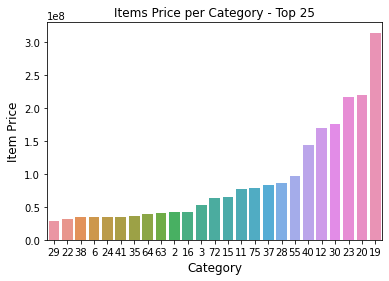

In [131]:
#print(x)

print('Min Total Sales: {}'.format(sales_item_cat.total_item_price.min()))
print('Max Total Sales:  {}'.format(sales_item_cat.total_item_price.max()))
print('Mean Total Sales:  {}'.format(sales_item_cat.total_item_price.mean()))
print('Median Total Sales: {}'.format(sales_item_cat.total_item_price.median()))

sales_item_cat = sales_item_cat.sort_values(by=['total_item_price'], ascending =False)

#Maybe need more but for now just take 25. 
sales_item_cat_top25 = sales_item_cat.head(n = 25)

# #plot
# plt.figure(figsize=(8,4))
ax= sns.barplot(sales_item_cat_top25.item_category_id, 
                sales_item_cat_top25.total_item_price,
               order=sales_item_cat_top25.sort_values('total_item_price').item_category_id)
plt.title("Items Price per Category - Top 25")
plt.ylabel('Item Price', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()

Min Total Sales: 41.0
Max Total Sales:  314836356.12249666
Mean Total Sales:  31135840.147181164
Median Total Sales: 9038632.528333332


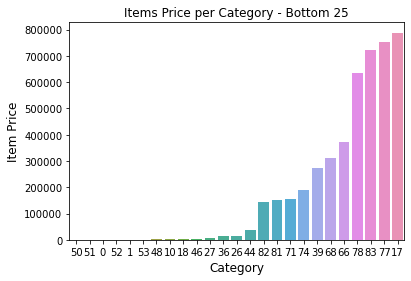

In [134]:
#print(x)

print('Min Total Sales: {}'.format(sales_item_cat.total_item_price.min()))
print('Max Total Sales:  {}'.format(sales_item_cat.total_item_price.max()))
print('Mean Total Sales:  {}'.format(sales_item_cat.total_item_price.mean()))
print('Median Total Sales: {}'.format(sales_item_cat.total_item_price.median()))

sales_item_cat = sales_item_cat.sort_values(by=['total_item_price'], ascending =False)

#Maybe need more but for now just take 25. 
sales_item_cat_bot25 = sales_item_cat.tail(n = 25)

# #plot
# plt.figure(figsize=(8,4))
ax= sns.barplot(sales_item_cat_bot25.item_category_id, 
                sales_item_cat_bot25.total_item_price,
               order=sales_item_cat_bot25.sort_values('total_item_price').item_category_id)
plt.title("Items Price per Category - Bottom 25")
plt.ylabel('Item Price', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()

In [153]:
# Find the dialy sales(train) min, max, etc
print('Min Sales: {}'.format(train.item_price.min()))
print('Max Sales:  {}'.format(train.item_price.max()))
print('Mean Sales:  {}'.format(train.item_price.mean()))
print('Median Sales: {}'.format(train.item_price.median()))

Min Sales: -1.0
Max Sales:  307980.0
Mean Sales:  890.8532326979881
Median Sales: 399.0


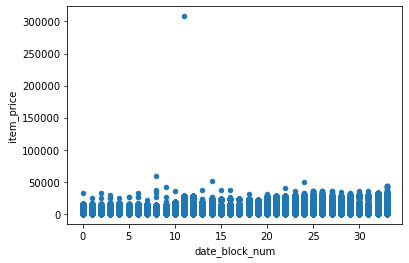

In [135]:
#Try to find out the scatter plot for sales

train.plot.scatter(x="date_block_num", y="item_price")

#outlier found

Count for Item Price more than 25000: 14


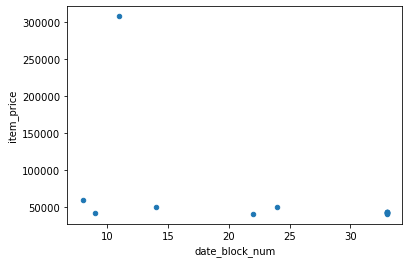

In [152]:
train_more_25000 = train.loc[(train['item_price']>=40000)]

print('Count for Item Price more than 25000: {}'.format(train_more_25000.shape[0]))
       
train_more_25000.plot.scatter(x="date_block_num", y="item_price")

Count for Item Price less than 40000: 2935835
Total count of train data: 2935849


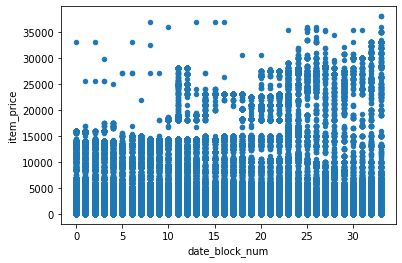

In [151]:
train_more_25000 = train.loc[(train['item_price']<40000)]

print('Count for Item Price less than 40000: {}'.format(train_more_25000.shape[0]))

print('Total count of train data: {}'.format(train.shape[0]))
       
train_more_25000.plot.scatter(x="date_block_num", y="item_price")